In [77]:
import sqlite3
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr, spearmanr
from scipy.stats import boxcox
from scipy.special import lambertw
import seaborn as sns

In [2]:
conn = sqlite3.connect("../../data/system_summaries.db")
df = pd.read_sql("SELECT * FROM system_summaries", conn)
conn.close()

In [48]:
df.shape

(1997, 15)

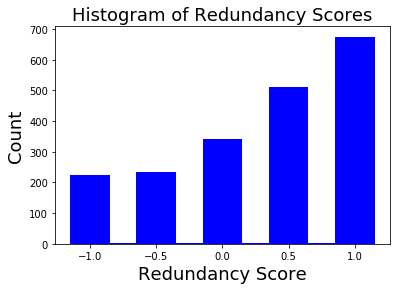

In [104]:
vals, counts = np.unique(df.redundancy, return_counts=True)
plt.bar(vals, counts, .3, color="blue")
plt.xlabel("Redundancy Score", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Histogram of Redundancy Scores", fontsize=18)
plt.show()

## Analysis of ELMo/Universal Sentence Encoder Redundancy Scores and Human Redundancy Scores

In [3]:
avg_redundancy_scores = []
_unique_vals, indices = np.unique([row.system + str(row.id) for _, row in df.iterrows()], return_index=True)
avg_redundancy_df = df.iloc[indices].sort_index()
for _index, row in avg_redundancy_df.iterrows():
    all_scores = df[(row.id == df.id) & (row.system == df.system)].redundancy
    avg_redundancy_scores.append(np.mean(all_scores))

In [4]:
df = avg_redundancy_df
df["redundancy"] = avg_redundancy_scores

#### Universal Sentence Encoder

For Mean

In [5]:
pearsonr(df.redundancy, df.mean_use_redundancy)

(0.37212455991980464, 1.2845444336325029e-66)

In [6]:
spearmanr(df.redundancy, df.mean_use_redundancy)

SpearmanrResult(correlation=0.2701434994552121, pvalue=9.7756206921354293e-35)

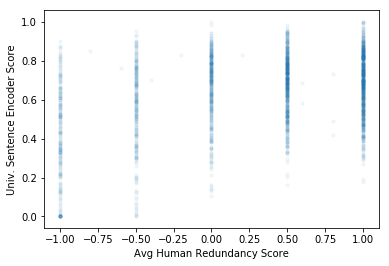

In [7]:
plt.ylabel("Univ. Sentence Encoder Score")
plt.xlabel("Avg Human Redundancy Score")
plt.scatter(list(df.redundancy), df.mean_use_redundancy, s=10, alpha=0.05)
plt.show()

In [8]:
use_redundany_score_pairs = list(zip(df.redundancy, df.mean_use_redundancy))
unique_scores = np.unique(df.redundancy)
for score in unique_scores:
    use_scores = [x[1] for x in use_redundany_score_pairs if x[0] == score]
    if len(use_scores) > 3:
        print("For score " + str(score) + ": mean is %0.3f and SD is %0.3f" %
         (np.mean(use_scores), np.std(use_scores)))

For score -1.0: mean is 0.421 and SD is 0.244
For score -0.5: mean is 0.556 and SD is 0.221
For score 0.0: mean is 0.655 and SD is 0.178
For score 0.5: mean is 0.675 and SD is 0.154
For score 1.0: mean is 0.679 and SD is 0.155


For Max

In [9]:
pearsonr(df.redundancy, df.max_use_redundancy)

(0.50187719444390855, 6.8642685385931339e-128)

In [10]:
spearmanr(df.redundancy, df.max_use_redundancy)

SpearmanrResult(correlation=0.43718612760232278, pvalue=5.2293512232785702e-94)

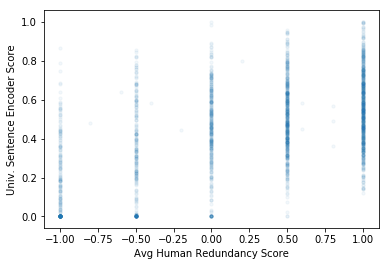

In [11]:
plt.ylabel("Univ. Sentence Encoder Score")
plt.xlabel("Avg Human Redundancy Score")
plt.scatter(list(df.redundancy), df.max_use_redundancy, s=10, alpha=0.05)
plt.show()

In [12]:
use_redundany_score_pairs = list(zip(df.redundancy, df.max_use_redundancy))
unique_scores = np.unique(df.redundancy)
for score in unique_scores:
    use_scores = [x[1] for x in use_redundany_score_pairs if x[0] == score]
    if len(use_scores) > 3:
        print("For score " + str(score) + ": mean is %0.3f and SD is %0.3f" %
         (np.mean(use_scores), np.std(use_scores)))

For score -1.0: mean is 0.190 and SD is 0.201
For score -0.5: mean is 0.329 and SD is 0.242
For score 0.0: mean is 0.453 and SD is 0.209
For score 0.5: mean is 0.510 and SD is 0.183
For score 1.0: mean is 0.560 and SD is 0.182


#### ELMo

For mean

In [13]:
pearsonr(df.redundancy, df.mean_elmo_redundancy)

(0.49657885334186624, 7.8297026182425018e-125)

In [14]:
spearmanr(df.redundancy, df.mean_elmo_redundancy)

SpearmanrResult(correlation=0.37992980770880025, pvalue=1.3741591468958902e-69)

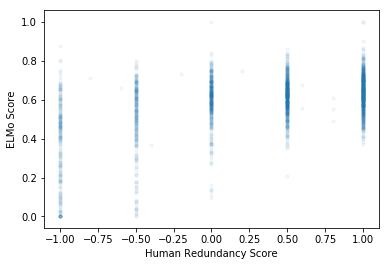

In [15]:
plt.ylabel("ELMo Score")
plt.xlabel("Human Redundancy Score")
plt.scatter(list(df.redundancy), df.mean_elmo_redundancy, s=10, alpha=0.05)
plt.show()

In [16]:
elmo_redundancy_score_pairs = list(zip(df.redundancy, df.mean_elmo_redundancy))
unique_scores = np.unique(df.redundancy)
for score in unique_scores:
    elmo_scores = [x[1] for x in elmo_redundancy_score_pairs if x[0] == score]
    if len(elmo_scores) > 3:
        print("For score " + str(score) + ": mean is %0.3f and SD is %0.3f" %
         (np.mean(elmo_scores), np.std(elmo_scores)))

For score -1.0: mean is 0.377 and SD is 0.213
For score -0.5: mean is 0.497 and SD is 0.183
For score 0.0: mean is 0.594 and SD is 0.124
For score 0.5: mean is 0.618 and SD is 0.091
For score 1.0: mean is 0.635 and SD is 0.091


For Max

In [17]:
pearsonr(df.redundancy, df.max_elmo_redundancy)

(0.60649117391743868, 6.3016785000999424e-201)

In [18]:
spearmanr(df.redundancy, df.max_elmo_redundancy)

SpearmanrResult(correlation=0.52853216651829538, pvalue=4.0795958915051075e-144)

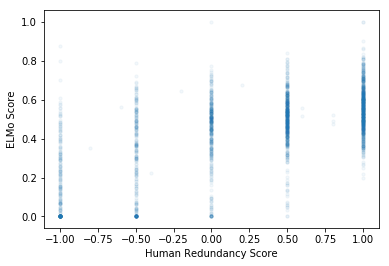

In [19]:
plt.ylabel("ELMo Score")
plt.xlabel("Human Redundancy Score")
plt.scatter(list(df.redundancy), df.max_elmo_redundancy, s=10, alpha=0.05)
plt.show()

In [20]:
elmo_redundany_score_pairs = list(zip(df.redundancy, df.max_elmo_redundancy))
unique_scores = np.unique(df.redundancy)
for score in unique_scores:
    elmo_scores = [x[1] for x in elmo_redundany_score_pairs if x[0] == score]
    if len(elmo_scores) > 3:
        print("For score " + str(score) + ": mean is %0.3f and SD is %0.3f" %
         (np.mean(elmo_scores), np.std(elmo_scores)))

For score -1.0: mean is 0.182 and SD is 0.188
For score -0.5: mean is 0.308 and SD is 0.216
For score 0.0: mean is 0.432 and SD is 0.178
For score 0.5: mean is 0.499 and SD is 0.131
For score 1.0: mean is 0.555 and SD is 0.116


## Unigram, Bigram, Trigram Repetitions

In [21]:
print(pearsonr(df.redundancy, df.unigram_repetitions))
print(pearsonr(df.redundancy, df.bigram_repetitions))
print(pearsonr(df.redundancy, df.trigram_repetitions))

(-0.39857018188582422, 5.0969816496908542e-77)
(-0.50550638734379816, 5.1432385396014956e-130)
(-0.53089284480958487, 1.2666692787223408e-145)


In [22]:
print(spearmanr(df.redundancy, df.unigram_repetitions))
print(spearmanr(df.redundancy, df.bigram_repetitions))
print(spearmanr(df.redundancy, df.trigram_repetitions))

SpearmanrResult(correlation=-0.41860272311207847, pvalue=1.4860811203096441e-85)
SpearmanrResult(correlation=-0.54730029863140572, pvalue=1.9254699430037933e-156)
SpearmanrResult(correlation=-0.55990730884181372, pvalue=3.586449796715034e-165)


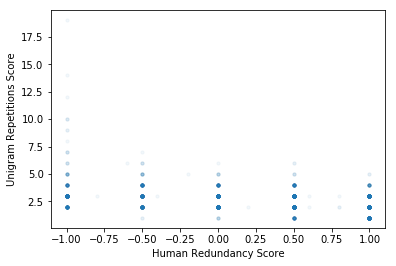

In [23]:
plt.ylabel("Unigram Repetitions Score")
plt.xlabel("Human Redundancy Score")
plt.scatter(list(df.redundancy), df.unigram_repetitions, s=10, alpha=0.05)
plt.show()

In [24]:
unigram_score_pairs = list(zip(df.redundancy, df.unigram_repetitions))
unique_scores = np.unique(df.redundancy)
for score in unique_scores:
    unigram_scores = [x[1] for x in unigram_score_pairs if x[0] == score]
    if len(unigram_scores) > 3:
        print("For score " + str(score) + ": mean is %0.3f and SD is %0.3f" %
         (np.mean(unigram_scores), np.std(unigram_scores)))

For score -1.0: mean is 3.453 and SD is 1.986
For score -0.5: mean is 2.983 and SD is 0.987
For score 0.0: mean is 2.700 and SD is 0.783
For score 0.5: mean is 2.459 and SD is 0.788
For score 1.0: mean is 2.098 and SD is 0.715


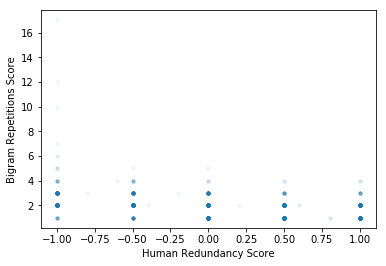

In [25]:
plt.ylabel("Bigram Repetitions Score")
plt.xlabel("Human Redundancy Score")
plt.scatter(list(df.redundancy), df.bigram_repetitions, s=10, alpha=0.05)
plt.show()

In [26]:
bigram_score_pairs = list(zip(df.redundancy, df.bigram_repetitions))
unique_scores = np.unique(df.redundancy)
for score in unique_scores:
    bigram_scores = [x[1] for x in bigram_score_pairs if x[0] == score]
    if len(bigram_scores) > 3:
        print("For score " + str(score) + ": mean is %0.3f and SD is %0.3f" %
         (np.mean(bigram_scores), np.std(bigram_scores)))

For score -1.0: mean is 2.658 and SD is 1.524
For score -0.5: mean is 2.209 and SD is 0.718
For score 0.0: mean is 1.848 and SD is 0.721
For score 0.5: mean is 1.512 and SD is 0.596
For score 1.0: mean is 1.280 and SD is 0.522


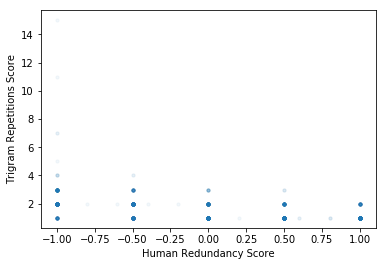

In [27]:
plt.ylabel("Trigram Repetitions Score")
plt.xlabel("Human Redundancy Score")
plt.scatter(list(df.redundancy), df.trigram_repetitions, s=10, alpha=0.05)
plt.show()

In [28]:
trigram_score_pairs = list(zip(df.redundancy, df.trigram_repetitions))
unique_scores = np.unique(df.redundancy)
for score in unique_scores:
    trigram_scores = [x[1] for x in trigram_score_pairs if x[0] == score]
    if len(trigram_scores) > 3:
        print("For score " + str(score) + ": mean is %0.3f and SD is %0.3f" %
         (np.mean(trigram_scores), np.std(trigram_scores)))

For score -1.0: mean is 2.324 and SD is 1.339
For score -0.5: mean is 1.735 and SD is 0.703
For score 0.0: mean is 1.294 and SD is 0.521
For score 0.5: mean is 1.118 and SD is 0.340
For score 1.0: mean is 1.052 and SD is 0.222


## Longest Repeated Substring

In [29]:
pearsonr(df.redundancy, df.lrs_score)

(-0.58074933245387894, 1.8660665130452061e-180)

In [30]:
spearmanr(df.redundancy, df.lrs_score)

SpearmanrResult(correlation=-0.58400301505223018, pvalue=6.0834697369943056e-183)

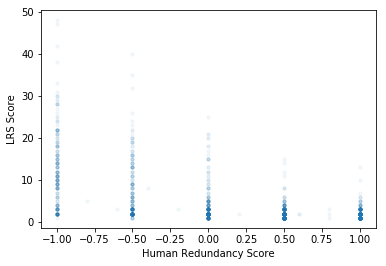

In [31]:
plt.ylabel("LRS Score")
plt.xlabel("Human Redundancy Score")
plt.scatter(list(df.redundancy), df.lrs_score, s=10, alpha=0.05)
plt.show()

For under 10 lrs score

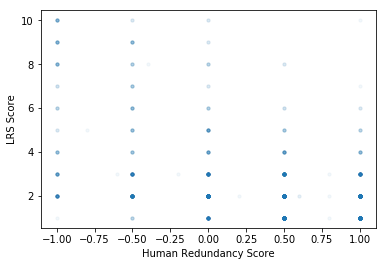

In [32]:
lrs_score_pairs = list(zip(df.redundancy, df.lrs_score))
plt.ylabel("LRS Score")
plt.xlabel("Human Redundancy Score")
lrs_score_pairs_under_10 = [x for x in lrs_score_pairs if x[1] < 11]
plt.scatter([x[0] for x in lrs_score_pairs_under_10], [x[1] for x in lrs_score_pairs_under_10], s=10, alpha=0.05)
plt.show()

In [33]:
unique_scores = np.unique(df.redundancy)
for score in unique_scores:
    lrs_scores = [x[1] for x in lrs_score_pairs if x[0] == score]
    if len(lrs_scores) > 3:
        print("For score " + str(score) + ": mean is %0.3f and SD is %0.3f" %
         (np.mean(lrs_scores), np.std(lrs_scores)))

For score -1.0: mean is 12.262 and SD is 8.785
For score -0.5: mean is 7.141 and SD is 6.711
For score 0.0: mean is 3.478 and SD is 3.698
For score 0.5: mean is 2.137 and SD is 1.398
For score 1.0: mean is 1.769 and SD is 0.977


# Correlations between Features

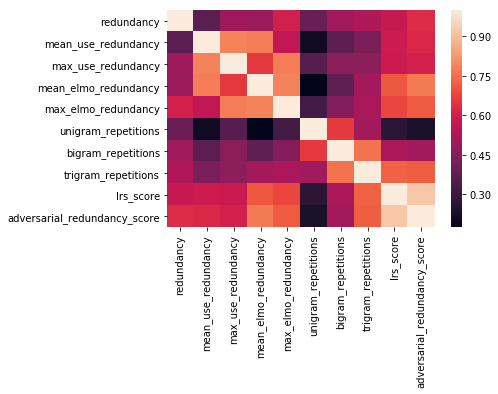

In [40]:
corr = df.drop(["annotator_id", "id"], axis=1).corr()
# plot the heatmap and annotation on it
sns.heatmap(abs(corr), xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [35]:
print(pearsonr(df.mean_elmo_redundancy, df.mean_use_redundancy))
print(pearsonr(df.max_elmo_redundancy, df.max_use_redundancy))
print(pearsonr(df.max_elmo_redundancy, df.mean_elmo_redundancy))
print(pearsonr(df.max_use_redundancy, df.mean_use_redundancy))
print(pearsonr(df.max_use_redundancy, df.mean_elmo_redundancy))
print(pearsonr(df.max_elmo_redundancy, df.mean_use_redundancy))

print("\nUnigram\n")
print(pearsonr(df.unigram_repetitions, df.mean_use_redundancy))
print(pearsonr(df.unigram_repetitions, df.max_use_redundancy))
print(pearsonr(df.unigram_repetitions, df.mean_elmo_redundancy))
print(pearsonr(df.unigram_repetitions, df.max_elmo_redundancy))
print("\nBigram\n")

print(pearsonr(df.bigram_repetitions, df.mean_use_redundancy))
print(pearsonr(df.bigram_repetitions, df.max_use_redundancy))
print(pearsonr(df.bigram_repetitions, df.mean_elmo_redundancy))
print(pearsonr(df.bigram_repetitions, df.max_elmo_redundancy))
print("\nTrigram\n")
print(pearsonr(df.trigram_repetitions, df.mean_use_redundancy))
print(pearsonr(df.trigram_repetitions, df.max_use_redundancy))
print(pearsonr(df.trigram_repetitions, df.mean_elmo_redundancy))
print(pearsonr(df.trigram_repetitions, df.max_elmo_redundancy))

print("\nBetween Unigram, Bigram, Trigram\n")
print("Unigram, Bigram:")
print(pearsonr(df.unigram_repetitions, df.bigram_repetitions))
print("Unigram, Trigram")
print(pearsonr(df.unigram_repetitions, df.trigram_repetitions))
print("Bigram, Trigram")
print(pearsonr(df.bigram_repetitions, df.trigram_repetitions))

(0.77601612194565339, 0.0)
(0.77668072718442061, 0.0)
(0.78545461394610872, 0.0)
(0.78709760555100483, 0.0)
(0.65832348595263257, 2.1595290421669314e-248)
(0.56646352625580365, 7.3172247360588575e-170)

Unigram

(-0.21088634819871335, 1.643027723846302e-21)
(-0.36200198309468079, 6.9398326399681713e-63)
(-0.17582966214200071, 2.4873798488475853e-15)
(-0.32183374144751875, 2.366734657892788e-49)

Bigram

(-0.37369308643415999, 3.2983399890792834e-67)
(-0.45998367996771222, 3.9935957145581773e-105)
(-0.38113329301664828, 4.7065119685212225e-70)
(-0.4519059672218434, 4.3411307477563798e-101)

Trigram

(-0.4346160170637286, 8.305349315539605e-93)
(-0.46956918861302821, 4.6631914659135722e-110)
(-0.50894019152323033, 4.7481887213433538e-132)
(-0.52442518868918664, 1.6062283783317192e-141)

Between Unigram, Bigram, Trigram

Unigram, Bigram:
(0.65934355225495267, 2.0174990898166574e-249)
Unigram, Trigram
(0.50668301432465523, 1.0390632648947518e-130)
Bigram, Trigram
(0.75759566760868635, 0.0)